In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [59]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/machine learning (actual)/data sceince/StatewiseTestingDetails.csv')
df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [60]:
df.tail()

,Date,State,TotalSamples,Negative,Positive
5961,2020-10-02,West Bengal,3314598.0,NaN,NaN
5962,2020-10-03,West Bengal,3355726.0,NaN,NaN
5963,2020-10-04,West Bengal,3397988.0,NaN,NaN
5964,2020-10-05,West Bengal,3438128.0,NaN,NaN
5965,2020-10-06,West Bengal,3480510.0,NaN,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5966 entries, 0 to 5965
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5966 non-null   object 
 1   State         5966 non-null   object 
 2   TotalSamples  5966 non-null   float64
 3   Negative      3418 non-null   object 
 4   Positive      4494 non-null   float64
dtypes: float64(2), object(3)
memory usage: 233.2+ KB


In [62]:
#DROPPING THE NAN VALUES OF POSITIVE COLUMN ONLY
df.dropna(subset=['Positive'],inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4494 entries, 0 to 5920
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4494 non-null   object 
 1   State         4494 non-null   object 
 2   TotalSamples  4494 non-null   float64
 3   Negative      2791 non-null   object 
 4   Positive      4494 non-null   float64
dtypes: float64(2), object(3)
memory usage: 210.7+ KB


In [64]:

df['monthval'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,State,TotalSamples,Negative,Positive,monthval
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0,4
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0,4
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0,4
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0,5
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0,5


In [65]:
df['dayval'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0,4,17
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0,4,24
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0,4,27
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0,5,1
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0,5,16


In [66]:
df['monthval'].nunique()

7

In [67]:
df['monthval'].unique()

array([ 4,  5,  6,  7,  8,  9, 10])

DROPPIN THE 8,9,10th months 
-because some of the states contains empty values

In [68]:
df=df[df.monthval != 8]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3871 entries, 0 to 5898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3871 non-null   object 
 1   State         3871 non-null   object 
 2   TotalSamples  3871 non-null   float64
 3   Negative      2506 non-null   object 
 4   Positive      3871 non-null   float64
 5   monthval      3871 non-null   int64  
 6   dayval        3871 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 241.9+ KB


In [69]:
df=df[df.monthval != 9]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699 entries, 0 to 5898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3699 non-null   object 
 1   State         3699 non-null   object 
 2   TotalSamples  3699 non-null   float64
 3   Negative      2434 non-null   object 
 4   Positive      3699 non-null   float64
 5   monthval      3699 non-null   int64  
 6   dayval        3699 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 231.2+ KB


In [70]:
df=df[df.monthval != 10]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 0 to 5898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3663 non-null   object 
 1   State         3663 non-null   object 
 2   TotalSamples  3663 non-null   float64
 3   Negative      2415 non-null   object 
 4   Positive      3663 non-null   float64
 5   monthval      3663 non-null   int64  
 6   dayval        3663 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 228.9+ KB


In [72]:
df.describe()

,TotalSamples,Positive,monthval,dayval
count,3.663000e+03,3663.000000,3663.000000,3663.000000
mean,2.059385e+05,12617.363363,5.676495,16.478296
std,3.425302e+05,36622.742344,1.072934,8.632493
min,5.800000e+01,0.000000,4.000000,1.000000
25%,1.171200e+04,162.500000,5.000000,9.000000
50%,5.569200e+04,1285.000000,6.000000,17.000000
75%,2.560380e+05,8097.500000,7.000000,24.000000
max,2.658138e+06,428684.000000,7.000000,31.000000


In [95]:
#highest positive affected state
df[df['Positive']==df['Positive'].max()]


,Date,State,TotalSamples,Negative,Positive,monthval,dayval
3392,2020-07-31,Maharashtra,2133720.0,1705036,428684.0,7,31


In [ ]:
#LEAST AFFECTED STATES WITH PARTICULAR DAY
print("25th percentile of arr : ",
       np.percentile(df['Positive'], 25))

In [96]:
np.percentile(df['Positive'], 25)

162.5

In [101]:

df[df['Positive']==162]

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
1882,2020-04-10,Haryana,3527.0,2447,162.0,4,10
3810,2020-07-03,Mizoram,14370.0,NaN,162.0,7,3
4109,2020-05-03,Odisha,38658.0,NaN,162.0,5,3
4871,2020-07-13,Sikkim,12636.0,10636,162.0,7,13


In [104]:
#OVERALL SUM
df['Positive'].sum()

46217402.0

In [112]:
#HIGHEST NUMBER OF SAMPLES TOOK FOR A PARTICULAR STATE IN A DAY  
df[df['TotalSamples']==df['TotalSamples'].max()]

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
5069,2020-07-31,Tamil Nadu,2658138.0,NaN,245859.0,7,31


In [113]:
#LOWEST NUMBER OF SAMPLES TOOK FOR A PARTICULAR STATE IN A DAY
df[df['TotalSamples']==df['TotalSamples'].min()]

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
3729,2020-04-06,Mizoram,58.0,0,1.0,4,6
3730,2020-04-07,Mizoram,58.0,0,1.0,4,7


# FOR A PARTICULAR STATE 

In [106]:
#ANALYSING FOR A STATE KERALA
b=df[df['State']=='Kerala']
b

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
2783,2020-04-01,Kerala,7965.0,7256,265.0,4,1
2784,2020-04-02,Kerala,8456.0,7622,286.0,4,2
2785,2020-04-03,Kerala,9139.0,8126,295.0,4,3
2786,2020-04-04,Kerala,9744.0,8586,306.0,4,4
2787,2020-04-05,Kerala,10221.0,9300,314.0,4,5
...,...,...,...,...,...,...,...
2900,2020-07-27,Kerala,688163.0,NaN,19728.0,7,27
2901,2020-07-28,Kerala,709348.0,NaN,20895.0,7,28
2902,2020-07-29,Kerala,733413.0,NaN,21798.0,7,29
2903,2020-07-30,Kerala,753485.0,NaN,22304.0,7,30


In [108]:
b.describe()

,TotalSamples,Positive,monthval,dayval
count,122.000000,122.000000,122.000000,122.000000
mean,175847.713115,3931.081967,5.508197,15.754098
std,203238.463546,5584.449794,1.122614,8.843274
min,7965.000000,265.000000,4.000000,1.000000
25%,30078.000000,497.500000,5.000000,8.000000
50%,79978.500000,1298.500000,5.500000,16.000000
75%,237155.250000,4555.250000,6.750000,23.000000
max,776268.000000,23614.000000,7.000000,31.000000


In [107]:
b['Positive'].sum()

479592.0

In [109]:
#HIGHEST  POSITIVE CASE IN A PARTICULAR DAY FOR KERALA
b[b['Positive']==b['Positive'].max()]

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
2904,2020-07-31,Kerala,776268.0,NaN,23614.0,7,31


In [110]:
#LOWEST CASES IN A PARTICULAR DAY for KERALA
b[b['Positive']==b['Positive'].min()]

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
2783,2020-04-01,Kerala,7965.0,7256,265.0,4,1


In [111]:
b['TotalSamples'].sum()

21453421.0

In [71]:
#CREATAIMNG A TABLE USING PIVOT 
#PIVOT-TABLE
dfPivot = pd.pivot_table(df,values = 'Positive',columns='State',index='monthval')
dfPivot

State,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Ladakh,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
monthval,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,24.000000,749.681818,1.538462,32.176471,143.875000,29.478261,32.772727,0.000000,1958.727273,6.894737,1944.227273,225.360000,37.000000,378.272727,54.111111,355.160000,391.433333,18.750000,1291.280000,4330.041667,2.000000,11.214286,1.000000,0.000000,72.840000,7.461538,236.458333,1384.600000,NaN,1429.875000,961.000000,2.000000,1127.833333,41.416667,384.285714
5,33.000000,2236.700000,2.200000,301.956522,1446.965517,194.066667,174.125000,1.153846,10237.600000,34.500000,10721.967742,956.838710,126.064516,1261.419355,264.161290,1412.516129,693.612903,45.875000,5022.903226,32753.161290,17.000000,14.266667,1.000000,4.451613,834.354839,30.000000,1820.838710,5303.032258,0.307692,11219.935484,1551.000000,148.290323,4695.774194,194.032258,2796.166667
6,47.600000,6888.500000,105.241379,4731.416667,6631.066667,364.965517,1717.533333,82.960000,48697.033333,625.966667,24551.666667,8185.366667,595.833333,5145.200000,1703.966667,7913.200000,2724.066667,602.363636,10951.066667,114329.793103,612.842105,41.214286,100.137931,209.133333,4288.500000,303.766667,3571.066667,13288.700000,49.535714,50264.900000,10318.071429,1030.533333,14998.000000,1932.666667,11761.200000
7,220.258065,53112.387097,685.193548,21770.400000,24550.516129,676.096774,5224.806452,613.821429,115763.633333,3313.322581,46187.000000,24343.741935,1544.290323,13026.129032,5473.580645,57623.700000,11762.096774,1158.714286,21245.967742,295931.096774,1859.583333,383.225806,268.870968,963.032258,16921.580645,1854.419355,9708.838710,28252.161290,288.586207,161894.838710,39933.133333,2747.548387,45519.964286,4467.032258,39689.709677


In [16]:
dfPivot.plot?

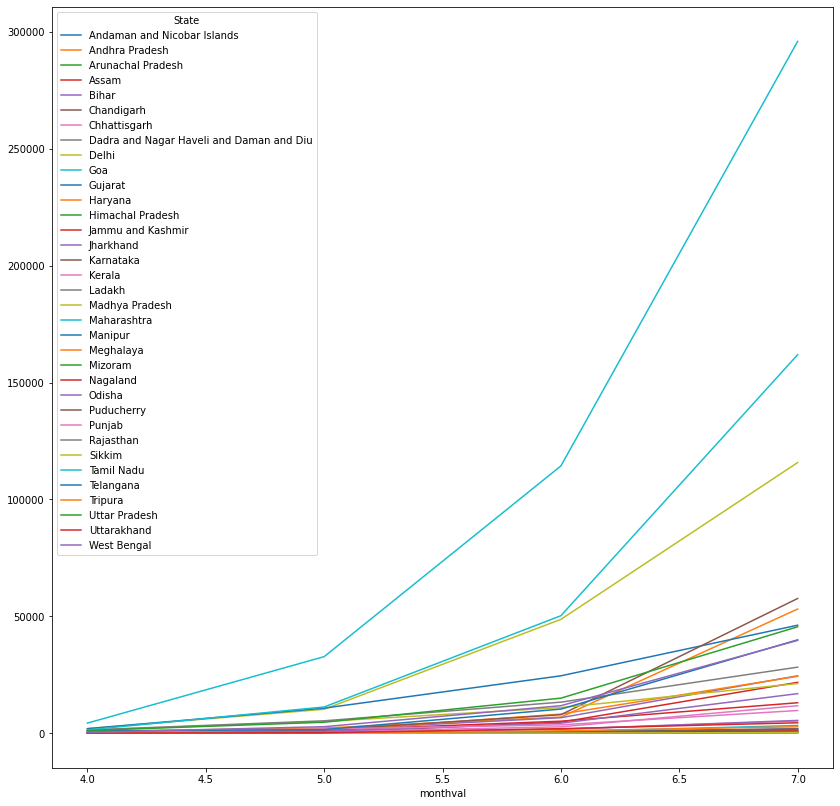

In [17]:
dfPivot.plot(figsize=(14,14))


In [18]:
sns.heatmap?

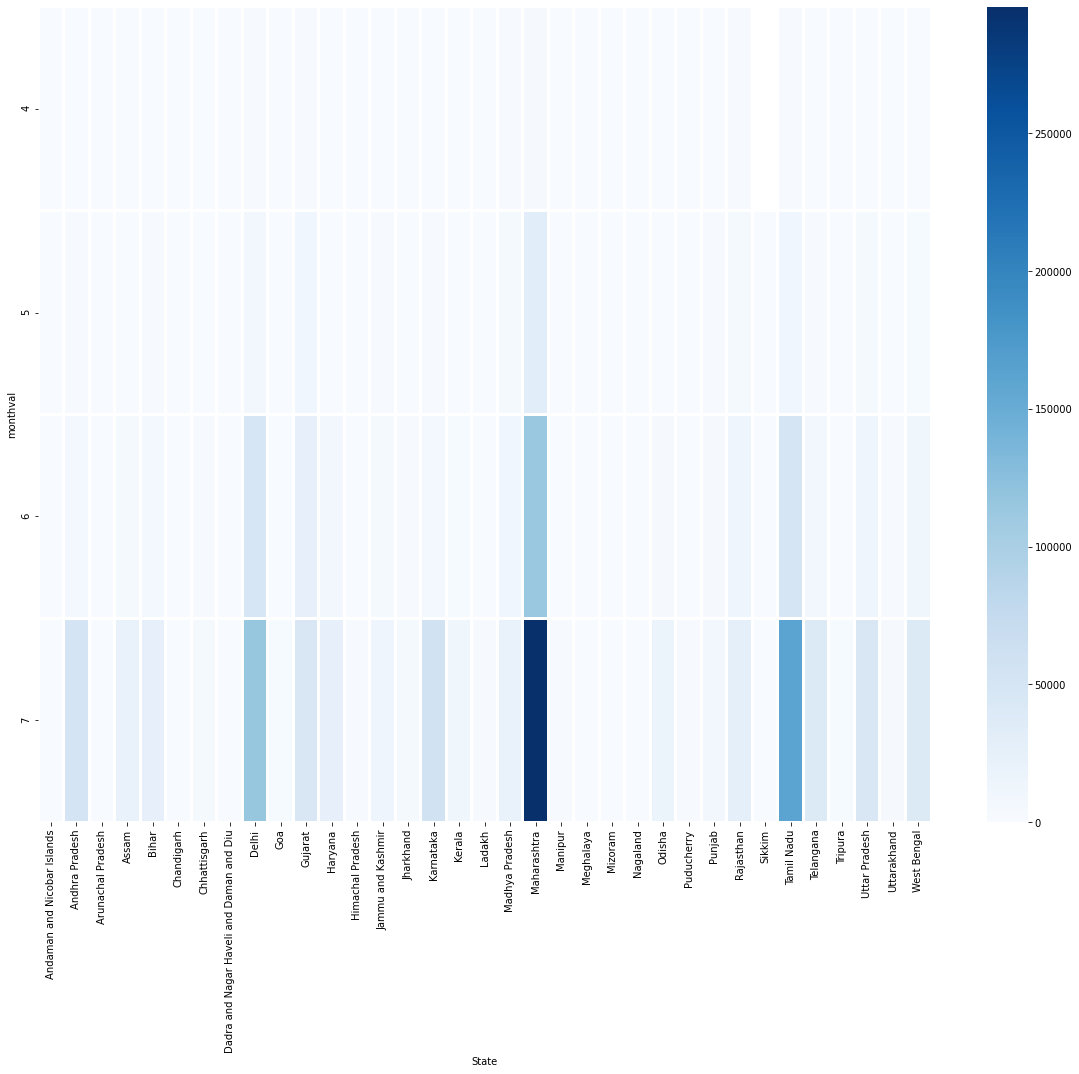

In [19]:

#sns.heatmap(dfPivot, cmap="YlGnBu")
#sns.heatmap(dfPivot, cmap="Blues")
#sns.heatmap(dfPivot, cmap="BuPu")
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(dfPivot, cmap="Blues",linewidths=2,ax=ax)



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 0 to 5898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3663 non-null   object 
 1   State         3663 non-null   object 
 2   TotalSamples  3663 non-null   float64
 3   Negative      2415 non-null   object 
 4   Positive      3663 non-null   float64
 5   monthval      3663 non-null   int64  
 6   dayval        3663 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 228.9+ KB


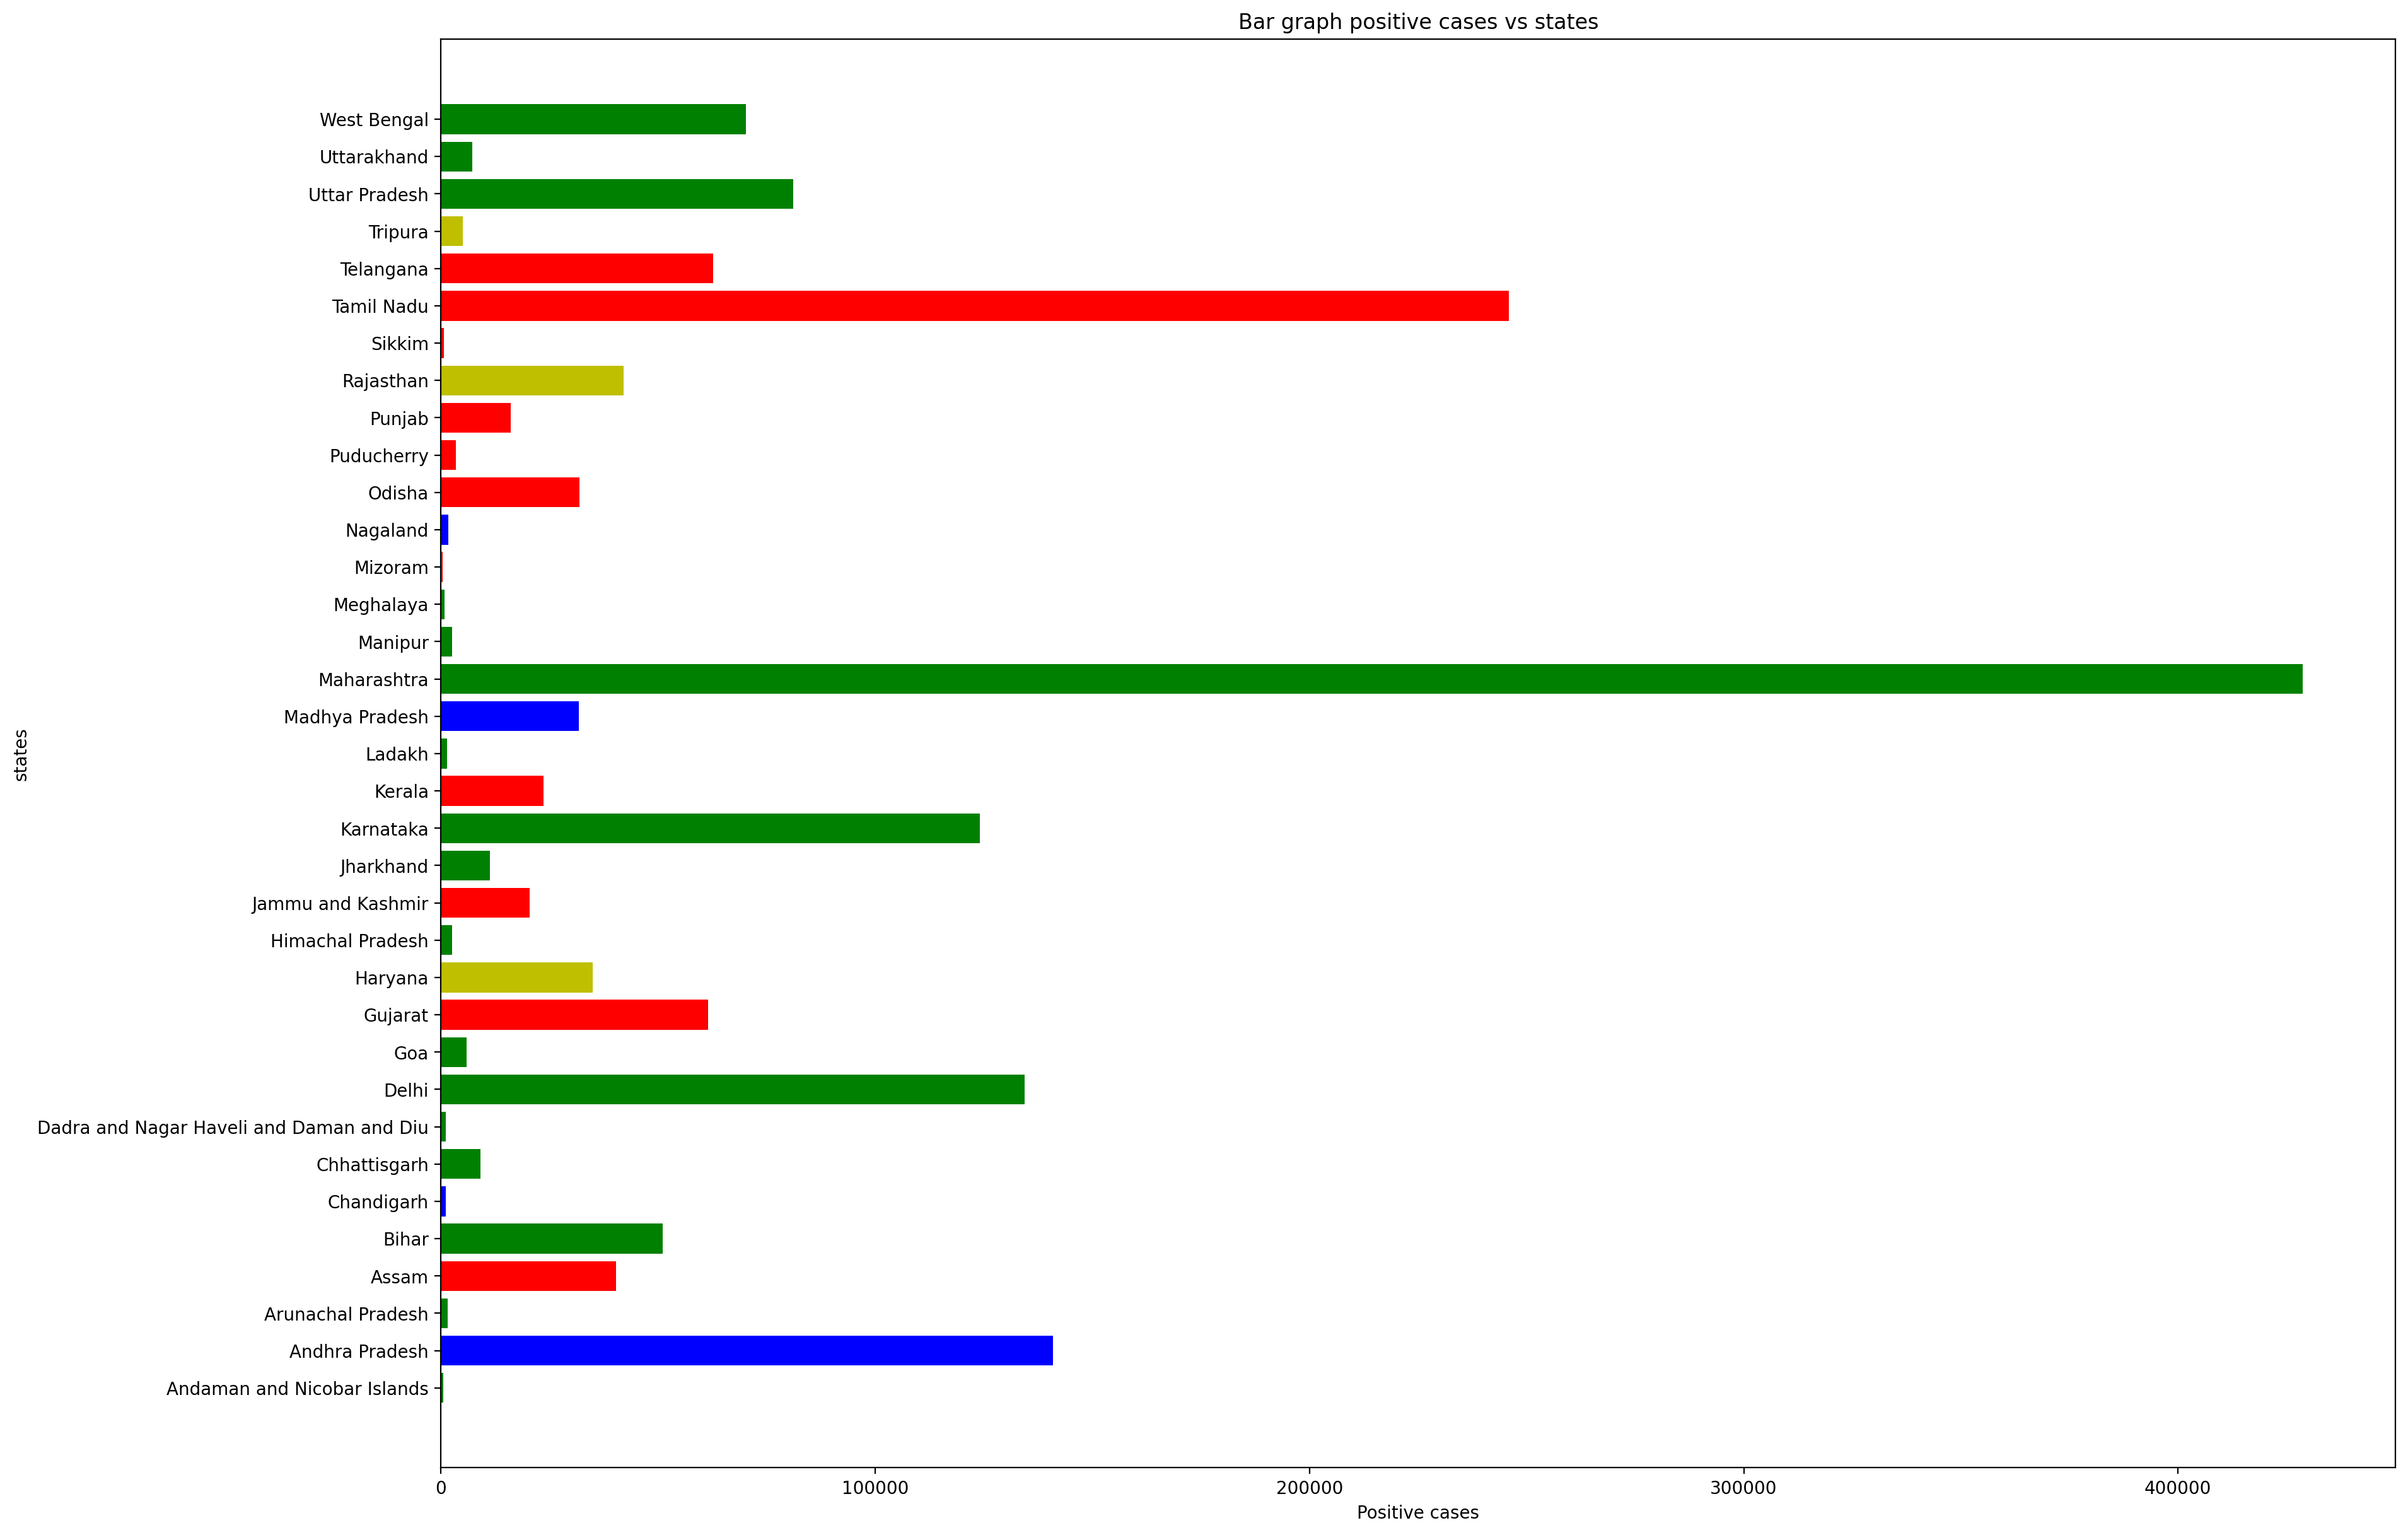

In [21]:
#PLOTTING BAR GRAPGH
plt.figure(figsize=(20,15),dpi=200)
plt.barh(df['State'],df['Positive'],color=['r', 'y', 'g', 'b'])
plt.title('Bar graph positive cases vs states')
plt.xlabel('Positive cases')
plt.ylabel('states')  
plt.show()

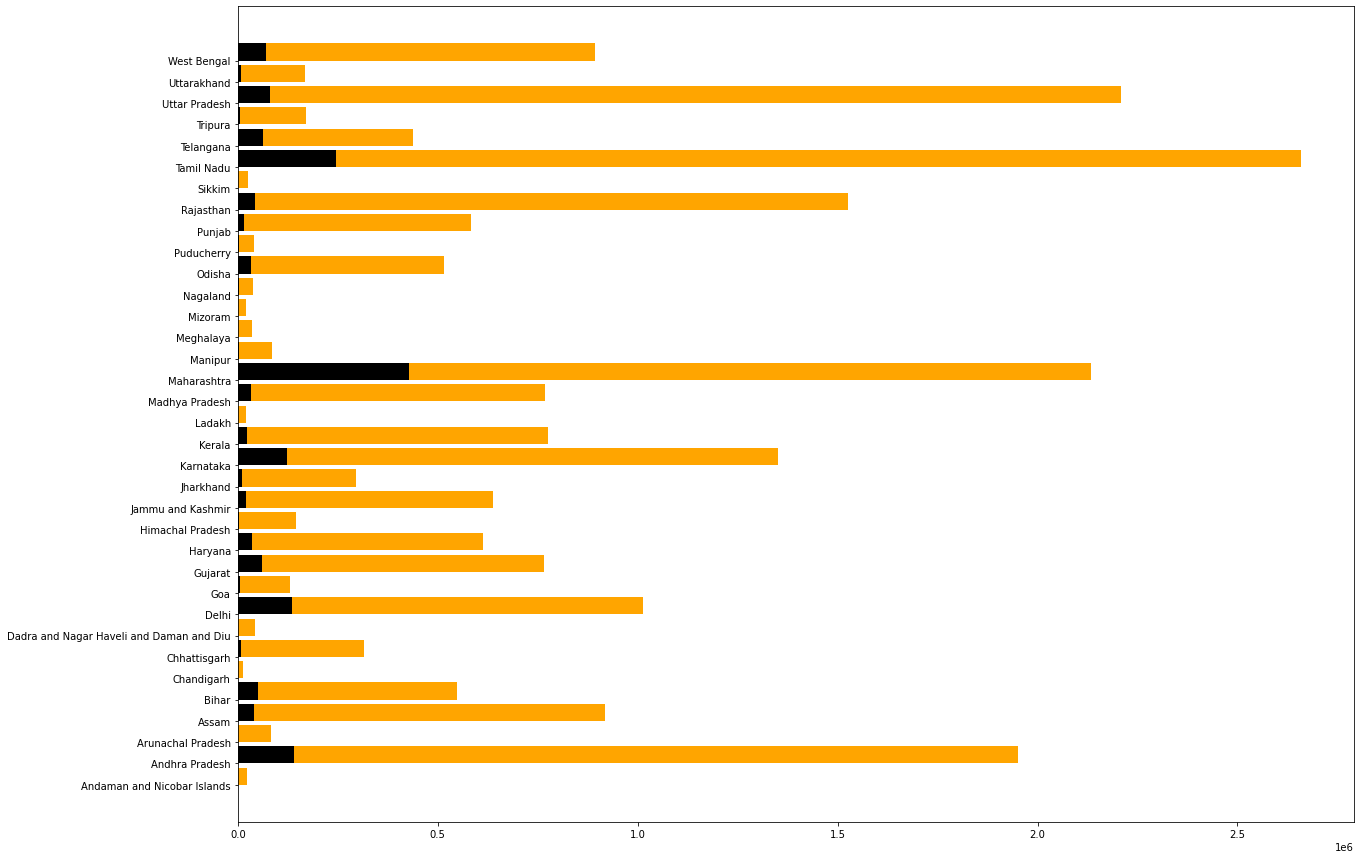

In [22]:
#PLOTTING BAR GRAPH WITH RESPECT TO TOTAL SAMPLES AND POSITIVE CASES
plt.figure(figsize=(20,15))

plt.barh(df['State'],df['TotalSamples'],color = 'orange',align='edge')

plt.barh(df['State'],df['Positive'],color = 'black',align = 'edge')

plt.show()

(array([3410.,  122.,   61.,   25.,   14.,   11.,    6.,    5.,    4.,
           5.]),
 array([     0. ,  42868.4,  85736.8, 128605.2, 171473.6, 214342. ,
        257210.4, 300078.8, 342947.2, 385815.6, 428684. ]),
 <a list of 10 Patch objects>)

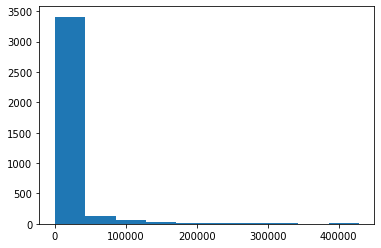

In [23]:
#plotting histogram of positive colummn
plt.hist(df['Positive'],bins=10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


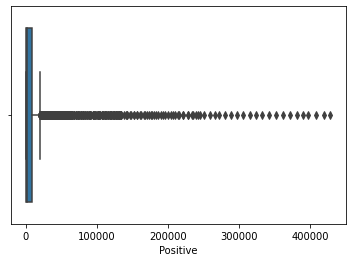

In [24]:
#PLOTTING BOXPLOT
sns.boxplot(df['Positive'])

In [25]:
a=df.groupby(df['State'])['Positive'].mean()
a

State
Andaman and Nicobar Islands                    111.683544
Andhra Pradesh                               17139.230088
Arunachal Pradesh                              236.689320
Assam                                         8235.723404
Bihar                                         8819.412281
Chandigarh                                     336.663717
Chhattisgarh                                  2041.074766
Dadra and Nagar Haveli and Daman and Diu       209.684783
Delhi                                        47178.928571
Goa                                           1135.083333
Gujarat                                      22311.412281
Haryana                                       8850.538462
Himachal Pradesh                               623.300885
Jammu and Kashmir                             5312.210526
Jharkhand                                     2090.572727
Karnataka                                    17403.224138
Kerala                                        3931.081967
Ladakh  

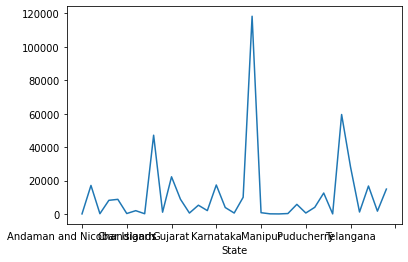

In [26]:
df.groupby(df['State'])['Positive'].mean().plot()

**ANALYSING THE DATA**

In [27]:
columns = ['TotalSamples','Positive','dayval','monthval']

In [28]:
def Sample(data, var_group):
  
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = df[i].min()
    maxi = df[i].max()
    ran = df[i].max()-data[i].min()
    mean = df[i].mean()
    median = df[i].median()
    st_dev = df[i].std()
    skew = df[i].skew()
    kurt = df[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

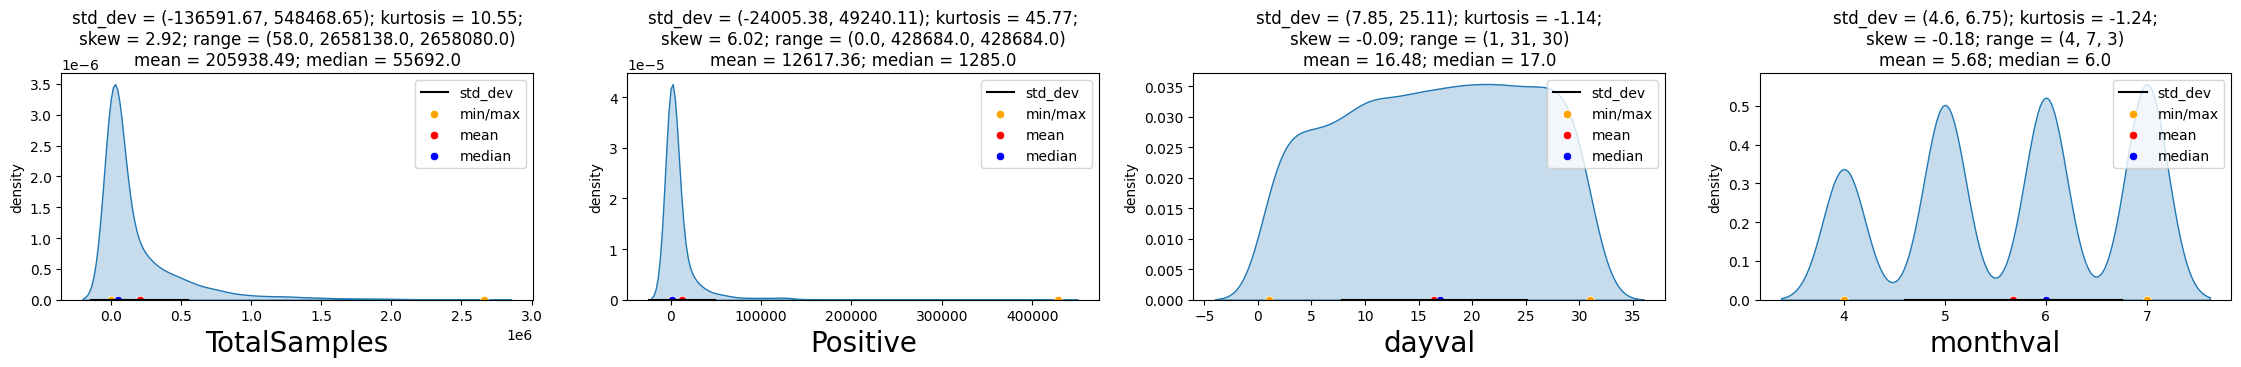

In [31]:
Sample(df,columns)

In [32]:
s = df['State'].value_counts()
s

Kerala                                      122
Haryana                                     117
Rajasthan                                   117
Odisha                                      117
Madhya Pradesh                              117
Karnataka                                   116
Punjab                                      116
Uttarakhand                                 116
Tamil Nadu                                  116
Maharashtra                                 115
Jammu and Kashmir                           114
Bihar                                       114
Gujarat                                     114
Chandigarh                                  113
Andhra Pradesh                              113
Himachal Pradesh                            113
Uttar Pradesh                               113
Delhi                                       112
West Bengal                                 112
Nagaland                                    111
Jharkhand                               

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 0 to 5898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3663 non-null   object 
 1   State         3663 non-null   object 
 2   TotalSamples  3663 non-null   float64
 3   Negative      2415 non-null   object 
 4   Positive      3663 non-null   float64
 5   monthval      3663 non-null   int64  
 6   dayval        3663 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 228.9+ KB


In [34]:
df.describe()

,TotalSamples,Positive,monthval,dayval
count,3.663000e+03,3663.000000,3663.000000,3663.000000
mean,2.059385e+05,12617.363363,5.676495,16.478296
std,3.425302e+05,36622.742344,1.072934,8.632493
min,5.800000e+01,0.000000,4.000000,1.000000
25%,1.171200e+04,162.500000,5.000000,9.000000
50%,5.569200e+04,1285.000000,6.000000,17.000000
75%,2.560380e+05,8097.500000,7.000000,24.000000
max,2.658138e+06,428684.000000,7.000000,31.000000


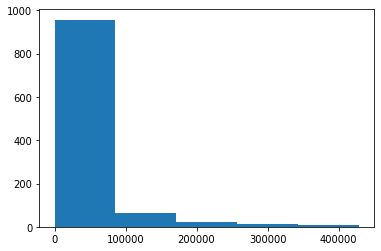

In [35]:
#PLOTTING GRAPH FOR LAST 30 DAYS I.E 7TH MONTH

a=df[df['monthval']==7]

plt.hist(a['Positive'],bins=5)
plt.show()

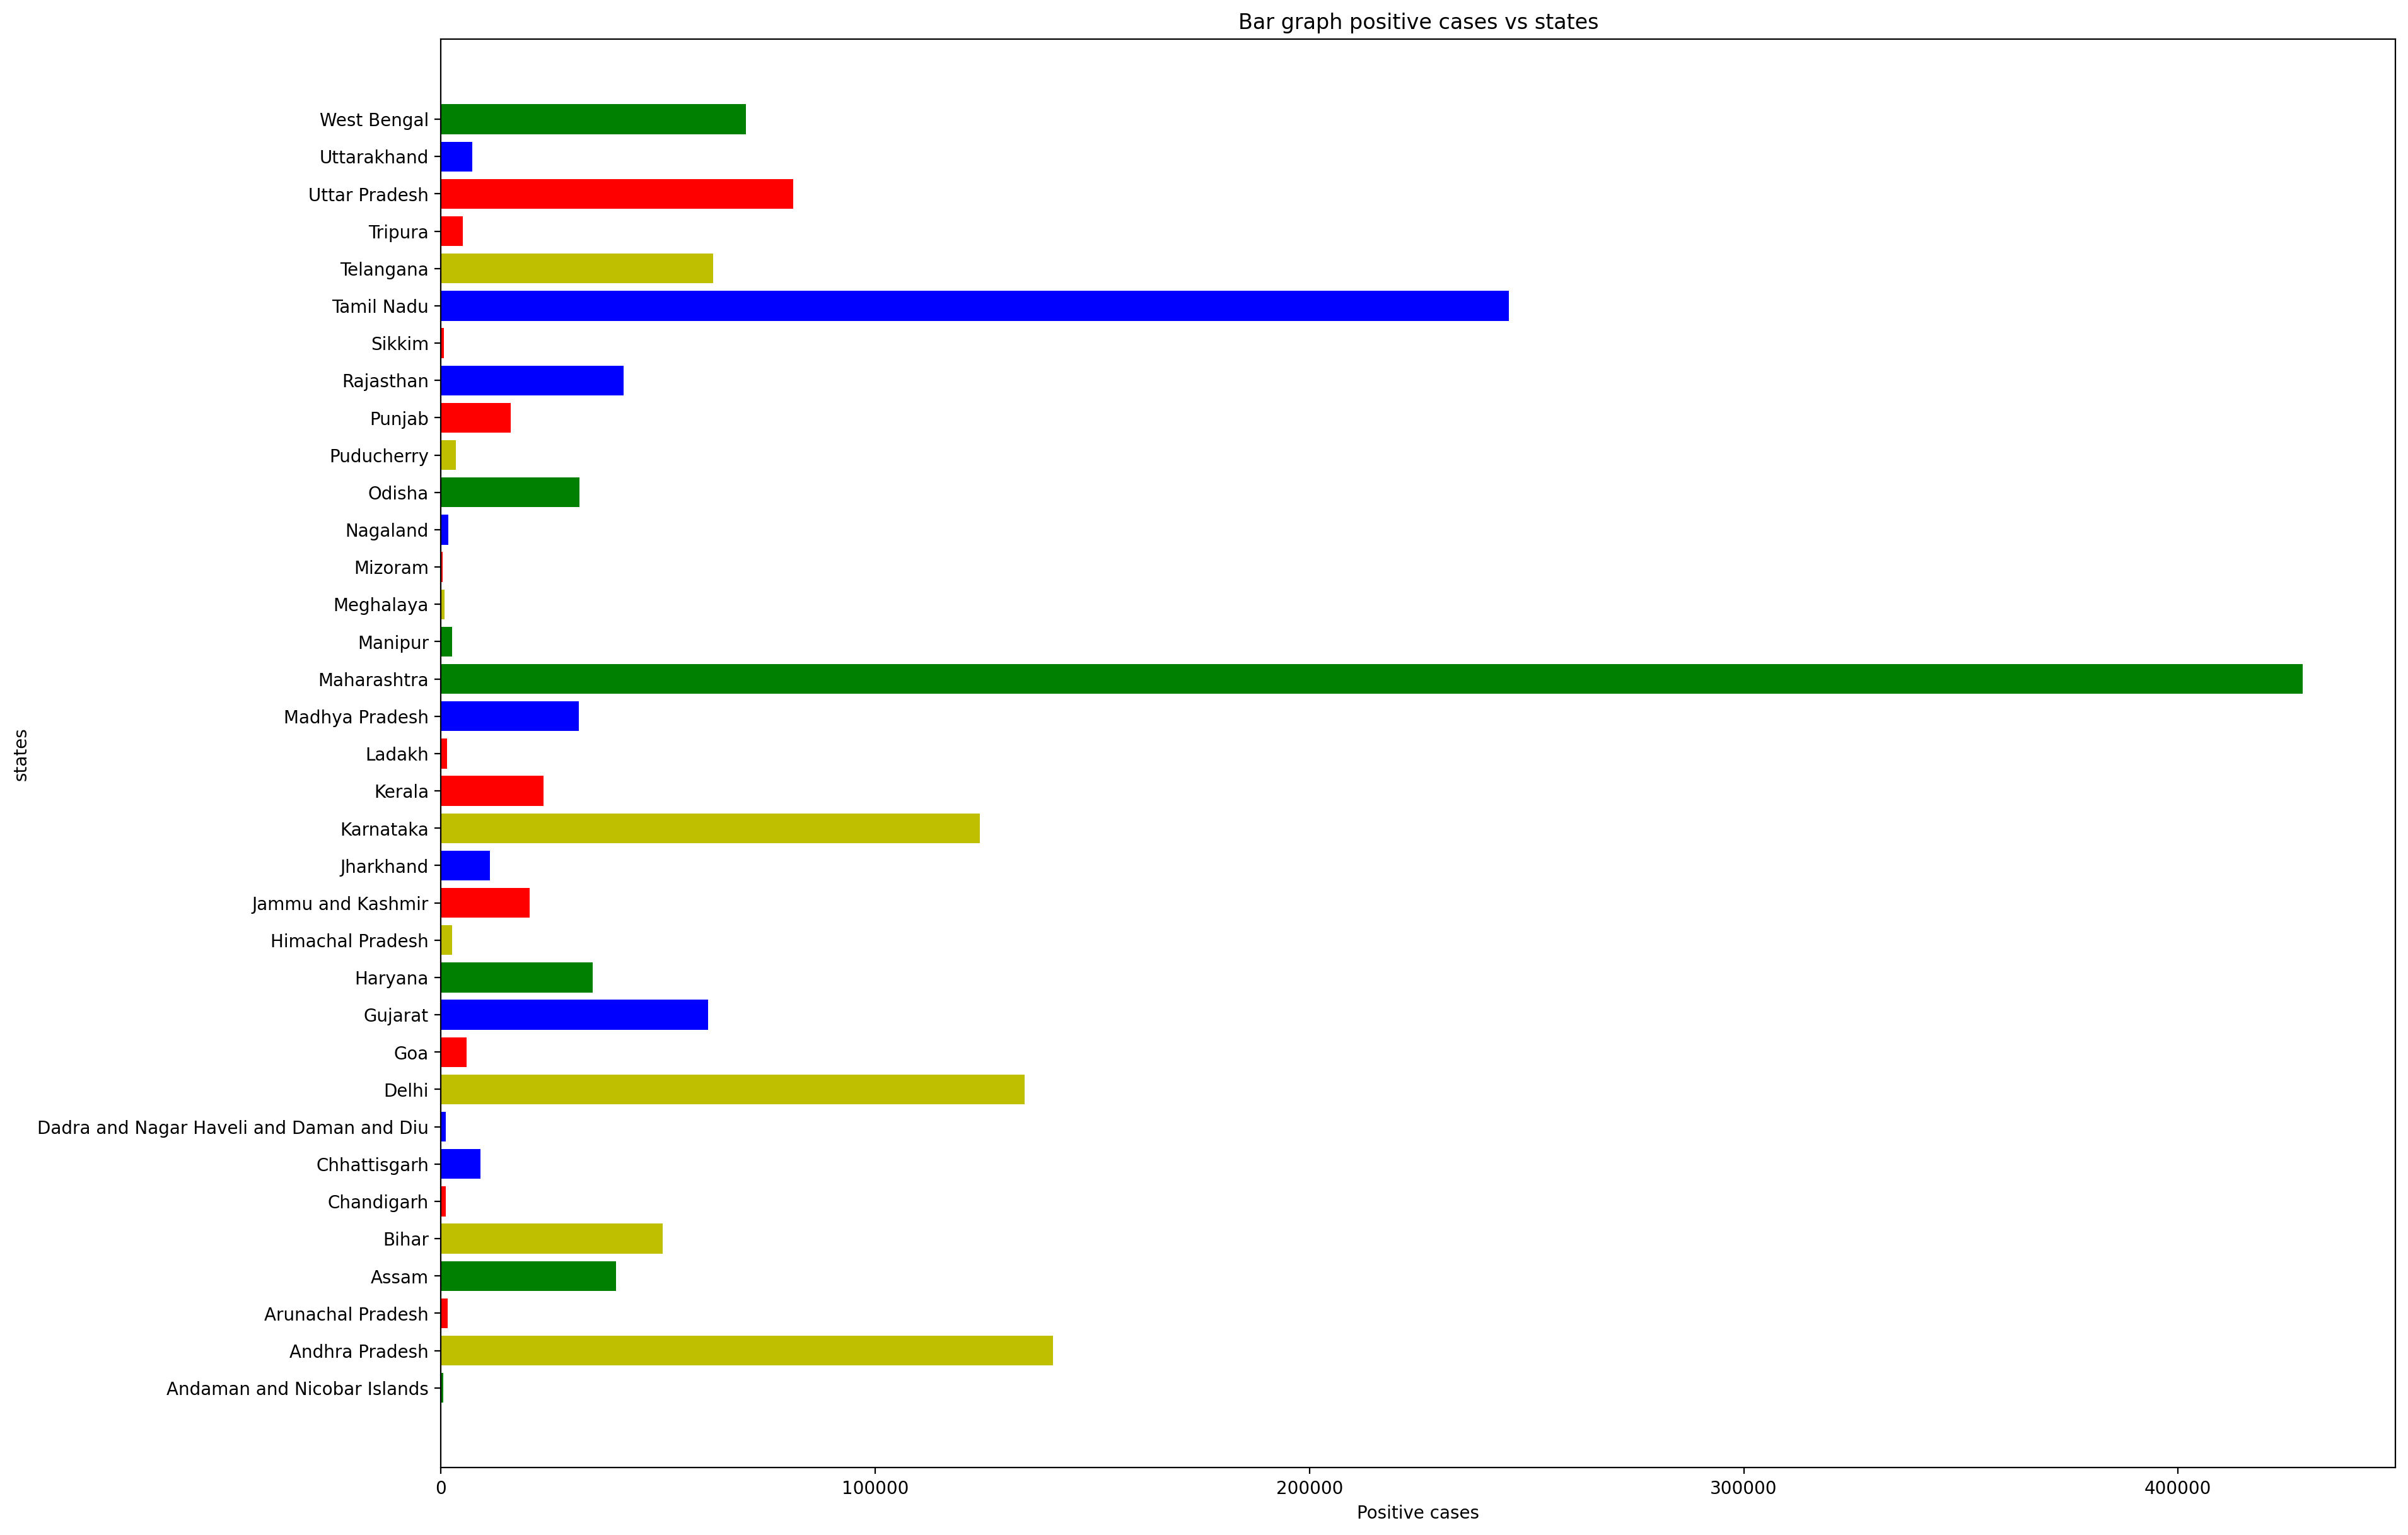

In [36]:
#PLOTTING GRAPH FOR LAST 30 DAYS I.E 7TH MONTH
plt.figure(figsize=(20,15),dpi=200)
plt.barh(a['State'],a['Positive'],color=['r', 'y', 'g', 'b'])
plt.title('Bar graph positive cases vs states')
plt.xlabel('Positive cases')
plt.ylabel('states')  
plt.show()

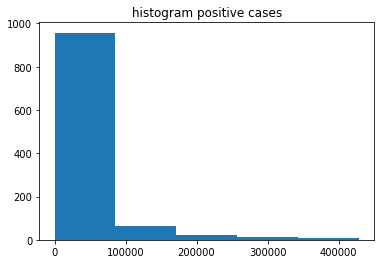

In [37]:
plt.title(' histogram positive cases ')

plt.hist(a['Positive'],bins=5)
plt.show()

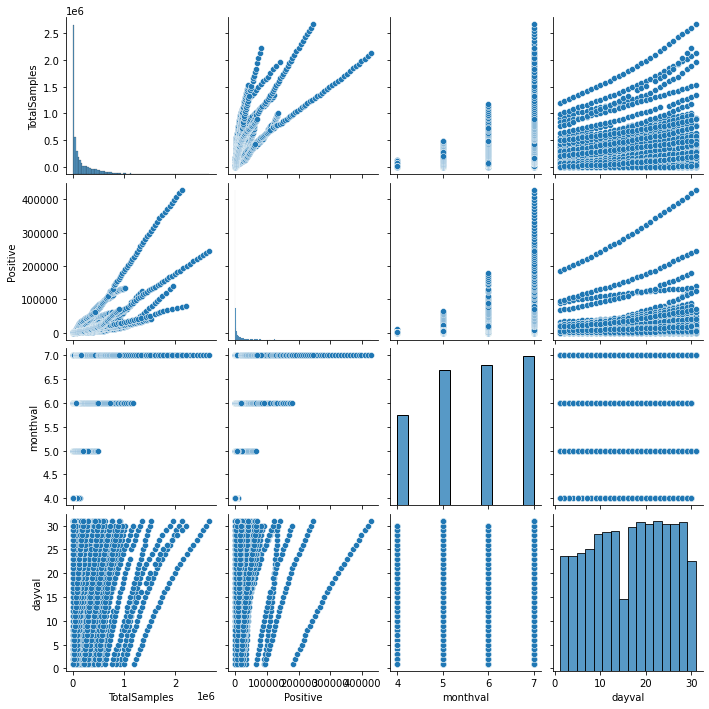

In [38]:
sns.pairplot(df)

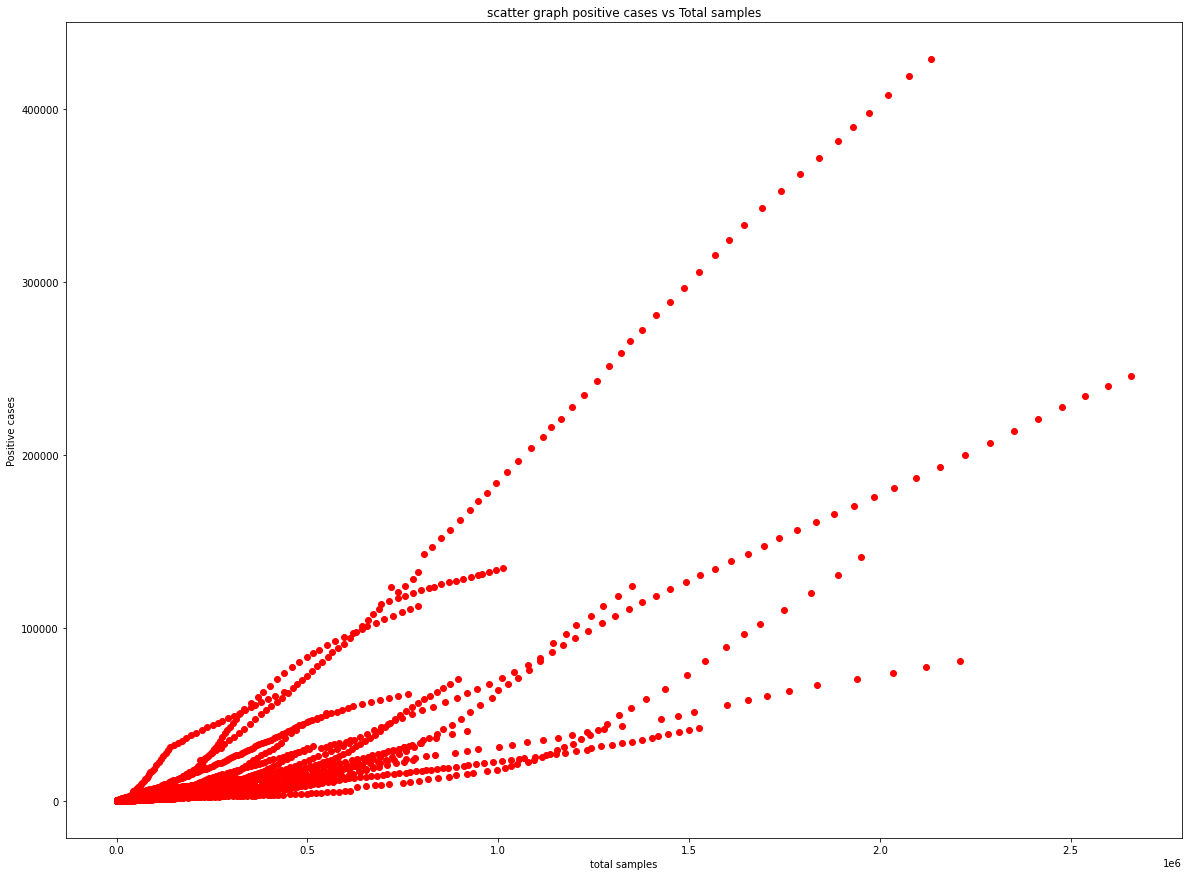

In [58]:
plt.figure(figsize=(20,15))
plt.scatter(df['TotalSamples'],df['Positive'],c='r')
plt.title('scatter graph positive cases vs Total samples')
plt.xlabel('total samples')
plt.ylabel('Positive cases')
plt.show()

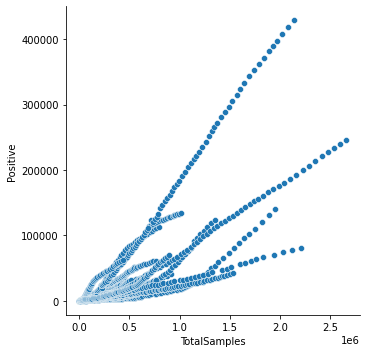

In [40]:
sns.relplot(x=df['TotalSamples'],y=df['Positive'])

In [41]:

df.index = pd.PeriodIndex(df.Date,freq='D')
df.index

PeriodIndex(['2020-04-17', '2020-04-24', '2020-04-27', '2020-05-01',
             '2020-05-16', '2020-05-19', '2020-05-20', '2020-05-21',
             '2020-05-22', '2020-05-23',
             ...
             '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
             '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
             '2020-07-30', '2020-07-31'],
            dtype='period[D]', name='Date', length=3663, freq='D')

In [42]:
df.index.rename('datenew',inplace=True)
df

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
datenew,,,,,,,
2020-04-17,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0,4,17
2020-04-24,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0,4,24
2020-04-27,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0,4,27
2020-05-01,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0,5,1
2020-05-16,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0,5,16
...,...,...,...,...,...,...,...
2020-07-27,2020-07-27,West Bengal,822190.0,NaN,60830.0,7,27
2020-07-28,2020-07-28,West Bengal,839211.0,NaN,62964.0,7,28
2020-07-29,2020-07-29,West Bengal,856355.0,NaN,65258.0,7,29


In [43]:
df = df.sort_values(by='Date')
df

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
datenew,,,,,,,
2020-04-01,2020-04-01,West Bengal,659.0,568,37.0,4,1
2020-04-01,2020-04-01,Kerala,7965.0,7256,265.0,4,1
2020-04-02,2020-04-02,Assam,962.0,819,16.0,4,2
2020-04-02,2020-04-02,Uttarakhand,678.0,554,7.0,4,2
2020-04-02,2020-04-02,Chandigarh,124.0,98,18.0,4,2
...,...,...,...,...,...,...,...
2020-07-31,2020-07-31,Andhra Pradesh,1951776.0,1810843,140933.0,7,31
2020-07-31,2020-07-31,Madhya Pradesh,767571.0,731704,31806.0,7,31
2020-07-31,2020-07-31,Maharashtra,2133720.0,1705036,428684.0,7,31


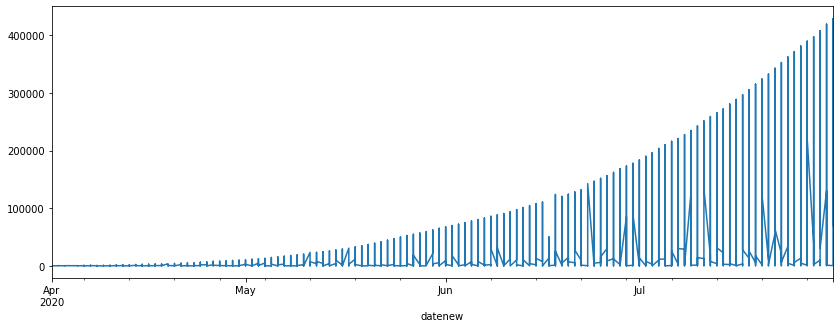

In [44]:
df.Positive.plot(figsize=(14,5))

In [57]:
df.Positive?

# MAKING PREDICTIONS FOR A PARTICULAR STATE

In [45]:
df[df['State']=='Karnataka']

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
datenew,,,,,,,
2020-04-03,2020-04-03,Karnataka,4587.0,4281,128.0,4,3
2020-04-07,2020-04-07,Karnataka,6580.0,5942,175.0,4,7
2020-04-08,2020-04-08,Karnataka,6967.0,6473,181.0,4,8
2020-04-09,2020-04-09,Karnataka,7613.0,7176,197.0,4,9
2020-04-10,2020-04-10,Karnataka,7975.0,7673,207.0,4,10
...,...,...,...,...,...,...,...
2020-07-27,2020-07-27,Karnataka,1205051.0,NaN,101465.0,7,27
2020-07-28,2020-07-28,Karnataka,1242771.0,NaN,107001.0,7,28
2020-07-29,2020-07-29,Karnataka,1275761.0,NaN,112504.0,7,29


In [46]:
df1=df[df['State']=='Karnataka']
df1

,Date,State,TotalSamples,Negative,Positive,monthval,dayval
datenew,,,,,,,
2020-04-03,2020-04-03,Karnataka,4587.0,4281,128.0,4,3
2020-04-07,2020-04-07,Karnataka,6580.0,5942,175.0,4,7
2020-04-08,2020-04-08,Karnataka,6967.0,6473,181.0,4,8
2020-04-09,2020-04-09,Karnataka,7613.0,7176,197.0,4,9
2020-04-10,2020-04-10,Karnataka,7975.0,7673,207.0,4,10
...,...,...,...,...,...,...,...
2020-07-27,2020-07-27,Karnataka,1205051.0,NaN,101465.0,7,27
2020-07-28,2020-07-28,Karnataka,1242771.0,NaN,107001.0,7,28
2020-07-29,2020-07-29,Karnataka,1275761.0,NaN,112504.0,7,29


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 116 entries, 2020-04-03 to 2020-07-31
Freq: D
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          116 non-null    object 
 1   State         116 non-null    object 
 2   TotalSamples  116 non-null    float64
 3   Negative      108 non-null    object 
 4   Positive      116 non-null    float64
 5   monthval      116 non-null    int64  
 6   dayval        116 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 7.2+ KB


In [48]:
df1['Positive']=df1['Positive'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 116 entries, 2020-04-03 to 2020-07-31
Freq: D
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          116 non-null    object 
 1   State         116 non-null    object 
 2   TotalSamples  116 non-null    float64
 3   Negative      108 non-null    object 
 4   Positive      116 non-null    int64  
 5   monthval      116 non-null    int64  
 6   dayval        116 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 7.2+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df1['Date']=pd.to_datetime(df1['Date'])
df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,State,TotalSamples,Negative,Positive,monthval,dayval
datenew,,,,,,,
2020-04-03,2020-04-03,Karnataka,4587.0,4281,128,4,3
2020-04-07,2020-04-07,Karnataka,6580.0,5942,175,4,7
2020-04-08,2020-04-08,Karnataka,6967.0,6473,181,4,8
2020-04-09,2020-04-09,Karnataka,7613.0,7176,197,4,9
2020-04-10,2020-04-10,Karnataka,7975.0,7673,207,4,10
...,...,...,...,...,...,...,...
2020-07-27,2020-07-27,Karnataka,1205051.0,NaN,101465,7,27
2020-07-28,2020-07-28,Karnataka,1242771.0,NaN,107001,7,28
2020-07-29,2020-07-29,Karnataka,1275761.0,NaN,112504,7,29


In [50]:
df_new=df1[['Date','Positive']]
df_new

,Date,Positive
datenew,,
2020-04-03,2020-04-03,128
2020-04-07,2020-04-07,175
2020-04-08,2020-04-08,181
2020-04-09,2020-04-09,197
2020-04-10,2020-04-10,207
...,...,...
2020-07-27,2020-07-27,101465
2020-07-28,2020-07-28,107001
2020-07-29,2020-07-29,112504


In [51]:
df_new=df_new.rename(columns={'Date':'ds','Positive':'y'})
df_new

,ds,y
datenew,,
2020-04-03,2020-04-03,128
2020-04-07,2020-04-07,175
2020-04-08,2020-04-08,181
2020-04-09,2020-04-09,197
2020-04-10,2020-04-10,207
...,...,...
2020-07-27,2020-07-27,101465
2020-07-28,2020-07-28,107001
2020-07-29,2020-07-29,112504


In [52]:
import fbprophet
op = fbprophet.Prophet(changepoint_prior_scale=0.5)
op.add_seasonality(name='Monthly',period=30,fourier_order=6)   #BASED UPON MONTHLYY 
op.fit(df_new)

# Make future possible prediction
forecast = op.make_future_dataframe(periods = 30,freq = 'd')
forecast = op.predict(forecast)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Monthly,Monthly_lower,Monthly_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-03,-9068.144041,-495.569174,119.354619,-9068.144041,-9068.144041,8792.687923,8792.687923,8792.687923,8873.020683,8873.020683,8873.020683,80.332760,80.332760,80.332760,0.0,0.0,0.0,-195.123358
1,2020-04-07,-4159.441729,404.846952,1054.129495,-4159.441729,-4159.441729,5006.570586,5006.570586,5006.570586,4890.919718,4890.919718,4890.919718,-115.650868,-115.650868,-115.650868,0.0,0.0,0.0,731.477989
2,2020-04-08,-2932.266151,107.967573,761.987567,-2932.266151,-2932.266151,3434.358268,3434.358268,3434.358268,3363.892008,3363.892008,3363.892008,-70.466260,-70.466260,-70.466260,0.0,0.0,0.0,431.625857
3,2020-04-09,-1705.090573,-117.572339,527.781368,-1705.090573,-1705.090573,1874.733164,1874.733164,1874.733164,1926.124276,1926.124276,1926.124276,51.391112,51.391112,51.391112,0.0,0.0,0.0,221.033703
4,2020-04-10,-477.914995,-377.186321,286.942940,-477.914995,-477.914995,340.689760,340.689760,340.689760,421.022520,421.022520,421.022520,80.332760,80.332760,80.332760,0.0,0.0,0.0,-56.892474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2020-08-26,213836.671872,164384.685786,260320.623607,162316.595736,258333.308309,1951.724699,1951.724699,1951.724699,1881.258439,1881.258439,1881.258439,-70.466260,-70.466260,-70.466260,0.0,0.0,0.0,215717.930311
142,2020-08-27,217645.726796,167299.070769,268166.469713,163458.887840,264519.676064,3915.846302,3915.846302,3915.846302,3967.237414,3967.237414,3967.237414,51.391112,51.391112,51.391112,0.0,0.0,0.0,221612.964209
143,2020-08-28,221454.781719,170476.459748,276714.455784,164385.977551,270660.806986,5901.086416,5901.086416,5901.086416,5981.419176,5981.419176,5981.419176,80.332760,80.332760,80.332760,0.0,0.0,0.0,227436.200894
144,2020-08-29,225263.836642,172812.021519,284987.405764,165225.456369,277534.185912,7503.891634,7503.891634,7503.891634,7486.976657,7486.976657,7486.976657,-16.914977,-16.914977,-16.914977,0.0,0.0,0.0,232750.813299


In [53]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-04-03,-195.123358
1,2020-04-07,731.477989
2,2020-04-08,431.625857
3,2020-04-09,221.033703
4,2020-04-10,-56.892474
...,...,...
141,2020-08-26,215717.930311
142,2020-08-27,221612.964209
143,2020-08-28,227436.200894
144,2020-08-29,232750.813299


Text(0.5, 1.0, 'Active Cases forecasting')

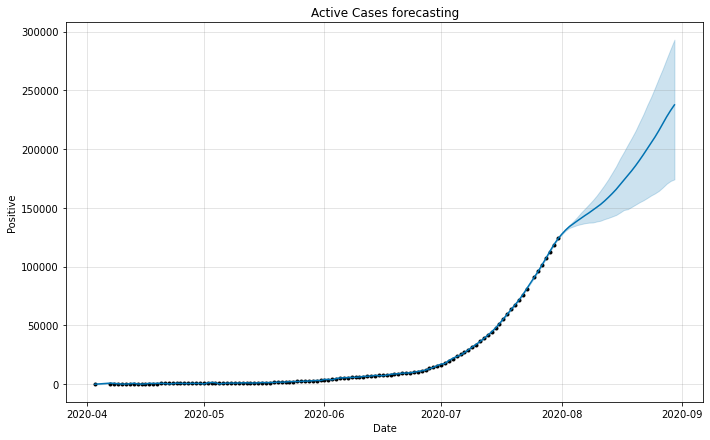

In [54]:
# Plotting the forecaster
import matplotlib.pyplot as plt

op.plot(forecast,xlabel='Date',ylabel='Positive')
plt.title('Active Cases forecasting')